In [15]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.models import load_model
from skimage import io
from matplotlib import pyplot as plt
from time import time
import numpy as np
import sys
import keras
import cv2
from keras.layers import DepthwiseConv2D
from keras.utils.generic_utils import CustomObjectScope

with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model = load_model('/Users/cloud/Desktop/MobileNet_Condition01_SaveBest_03.h5')

In [16]:
#修正版餘弦相似度
import math
def cosine_similarity_new(v1,v2):#值介於正負1之間
    sumxx, sumxy, sumyy = 0, 0.0, 0.0
    totalx, totaly = 0.0, 0.0
    
    for i in range(len(v1)):
        totalx+=v1[i]
        totaly+=v2[i]
    meanx = totalx/len(v1)
    meany = totaly/len(v2)
    
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += ((x-meanx)*(x-meanx))
        sumyy += ((y-meany)*(y-meany))
        sumxy += ((x-meanx)*(y-meany))
    return sumxy/math.sqrt(sumxx*sumyy)

v1,v2 = [1,0,0,0], [0,1,0,0]
print(v1, v2, cosine_similarity_new(v1,v2))

[1, 0, 0, 0] [0, 1, 0, 0] -0.3333333333333333


(224, 224, 3)


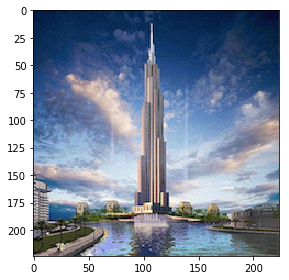

1/1 [==============================] - 2s 2s/step
[[9.4758175e-02 3.3252226e-04 3.1635349e-04 1.5439267e-02 2.1246949e-03
  1.0040029e-04 5.8220889e-05 4.8376215e-04 4.6750688e-04 1.3928815e-03
  1.0639003e-02 3.8971356e-04 3.4548185e-04 1.9031923e-04 9.8576282e-05
  1.8805165e-03 3.8496526e-03 4.4427472e-03 8.6163396e-01 1.0563117e-03]]


In [17]:
#匯入隨機網路圖片，轉換成特定型態並預測
inputImage = np.zeros(shape=(1, 224, 224, 3))
imageX = io.imread('/Users/cloud/Desktop/Tower.jpg')#取得圖片(必須為224x224)
print(imageX.shape)
res = cv2.resize(imageX, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
p = io.imshow(res)
plt.show(p)

res = res.astype('float32')/255.0
inputImage[0] = res
predictionInputImage = model.predict(inputImage, verbose = 1)
print(predictionInputImage)

In [18]:
#載入處理完成的895個相似值和標籤，進行相似度比較，並存放到新陣列
similarity = np.zeros(shape=(895, 2))#用來存放餘弦相似度值的1000個值和景點(0到100)和編號(1到1000)
pre895 = np.loadtxt('/Users/cloud/Desktop/numpyTOUR_895/20places_predict_895.txt', delimiter=' ')
#print(pre895)
print(pre895.shape)
for i in range(895):
    aaa = cosine_similarity_new(predictionInputImage[0], pre895[i])
    #print(aaa)
    similarity[i][0] = aaa#儲存餘弦相似值
    print(aaa)
    similarity[i][1] = int(i)#存放第幾個景點(int型態)(從0開始)
    print(i)

(895, 20)
-0.17019576558021887
0
-0.07565587942884747
1
-0.09738251934932049
2
-0.17588494515663816
3
-0.07988573987832073
4
-0.04227613266821119
5
-0.12289013277465567
6
-0.10639634450521997
7
-0.06597187444853544
8
-0.06272091068661495
9
-0.01805895727058208
10
-0.13504292742201418
11
-0.10839949725805963
12
-0.07442887286993563
13
-0.06325247987233695
14
-0.08981682580560847
15
-0.10783317421305237
16
-0.11687192216700773
17
-0.10845451473564381
18
0.19877788632260865
19
-0.07241572373774388
20
-0.059993113134211906
21
-0.19066178792319383
22
-0.07247578122293549
23
-0.11078418697772205
24
-0.0778591701842371
25
-0.1027674948653801
26
-0.10053138904744346
27
-0.0932446580007305
28
-0.15259406077609544
29
-0.08666232319858132
30
-0.07111587017655976
31
-0.07270398865058113
32
-0.13692023790282762
33
-0.022075250270365835
34
-0.06134655241977922
35
-0.12437262995222106
36
-0.05518226954452378
37
-0.019096224568922293
38
-0.0921237554772487
39
-0.08805659791920195
40
-0.049451674400150

-0.06017556815436155
443
-0.10674258822506089
444
-0.07721013693039835
445
-0.05776534071772022
446
-0.0732272538541773
447
0.6307471298214273
448
-0.0346318173246524
449
-0.10771662369516835
450
-0.07902073390832708
451
-0.06312248443735344
452
-0.1456251308629751
453
-0.07849430292190682
454
-0.18694125300532985
455
-0.09547039793407823
456
-0.07540610147498761
457
-0.06017572581727001
458
-0.09932041600895741
459
-0.05548100889015739
460
-0.05050634969627687
461
-0.060738092419661015
462
0.05145692737999021
463
-0.059944365818402234
464
-0.11813055746530973
465
0.023968361647962448
466
-0.07719854916107614
467
-0.059883628074584166
468
0.07648806429559774
469
-0.05929818032550175
470
-0.06727024536411258
471
-0.12037901636813081
472
-0.1102192626178358
473
-0.10435809112333029
474
-0.06101963497869126
475
-0.0249291217714209
476
0.05294890569097277
477
-0.06603263535973064
478
-0.019853889594258125
479
-0.09092203732404122
480
0.3695437735651688
481
-0.14201864433235478
482
-0.08716

-0.1114622532771151
808
-0.07760254779187253
809
-0.0643071200907875
810
-0.12428310888916004
811
0.009003360577170381
812
-0.08839447121427184
813
-0.07690920550631795
814
-0.15097093020740132
815
-0.14999854981194058
816
-0.07084398180126257
817
-0.08692443356932023
818
-0.05996722618593697
819
-0.06085077303869199
820
-0.10167715335611793
821
-0.023290939662003667
822
-0.013607364499103932
823
-0.13423002099350478
824
-0.09227196396720451
825
-0.08225707331635067
826
-0.01807867485663348
827
-0.060225223136737296
828
-0.1233547548389837
829
-0.14382296086421945
830
-0.12450825296914018
831
-0.13559289407461908
832
-0.06758320952615454
833
-0.10035825129640154
834
-0.10438068258080362
835
0.5583319129851984
836
-0.08694898253810276
837
-0.11006128482058507
838
0.0008558347038251142
839
-0.06648448401493272
840
-0.06978720271595847
841
-0.16602374231123868
842
-0.04933595807748259
843
-0.04067225507745852
844
-0.21209678211063066
845
-0.0611089925126368
846
-0.06126826634774556
847
-0

In [20]:
print(similarity2)

[[-1.70195766e-01  0.00000000e+00]
 [-7.56558794e-02  1.00000000e+00]
 [-9.73825193e-02  2.00000000e+00]
 ...
 [-6.93204455e-02  8.92000000e+02]
 [-6.23932520e-02  8.93000000e+02]
 [-5.05063497e-02  8.94000000e+02]]


In [22]:
#895個景點名稱
import pandas as pd
df = pd.read_excel('/Users/cloud/Desktop/open_data.xlsx')
df

,景點,介紹,地點
0,加路蘭,加路蘭有一大片寬廣的草坪、休憩涼亭、解說站以及觀景台，不但提供了東海岸旅行的最佳休息站，也是...,臺東縣950臺東市台11線157公里處
1,目斗嶼,目斗嶼與其南側的吉貝嶼相隔7公里。全島周長843公尺，面積僅0.0244平方公里，是一個迷你...,澎湖縣白沙鄉目斗嶼
2,吉貝嶼,吉貝嶼全島面積約3.1平方公里，海岸線長約13公里，是北海最大的島嶼，國內最熱門的旅遊景點。...,澎湖縣白沙鄉吉貝嶼
3,姑婆嶼,姑婆嶼位於白沙的西北方、吉貝嶼的西南方，為一座玄武岩構成的方山台地，南、北長約1公里，是澎湖...,澎湖縣白沙鄉姑婆嶼
4,險礁嶼,險礁嶼位在吉貝嶼南方，因附近海域有許多暗礁而得名，整座島不大，北側及東北側主要由岩石及珊瑚淺...,澎湖縣白沙鄉險礁嶼
5,觀音亭親水遊憩區,【縣定古蹟】觀音亭又稱觀音廟，位於媽宮城牆西側海岸邊，創建於清康熙三十五年(西元1696年)...,澎湖縣馬公市媽宮城牆西側海岸邊
6,菜園休閒漁業區,清代開墾初期，因地勢較低，水源豐沛且土壤肥沃，得以栽種一畝畝的綠色田園，因此以「菜園」命名。...,澎湖縣馬公市菜園里
7,風櫃洞,到澎湖遊賞的人，一定要到風櫃聽聽濤聲，否則便不能算是到過澎湖。「風櫃聽濤」為澎湖知名的景點。...,澎湖縣馬公市風櫃里風櫃洞
8,嵵裡沙灘,嵵裡聚落北邊有一座小山丘，形似古代官員所戴的紗帽，稱為紗帽山，嵵裡聚落正位於紗帽所延伸出來的...,澎湖縣馬公市嵵裡里
9,山水沙灘,山水古稱「豬母落水」。地名的由來有一種說法是:曾經有一隻母豬跑到沙灘上被大章魚拖下海去，所以...,澎湖縣馬公市山水里


In [23]:
name = df['景點']
print(name)
print(name[0])
print(type(name[0]))
print(name.count())

0                 加路蘭
1                 目斗嶼
2                 吉貝嶼
3                 姑婆嶼
4                 險礁嶼
5            觀音亭親水遊憩區
6             菜園休閒漁業區
7                 風櫃洞
8                嵵裡沙灘
9                山水沙灘
10              菓葉觀日樓
11              北寮遊憩區
12             東衛石雕公園
13             中屯風力園區
14               通梁古榕
15             澎湖跨海大橋
16                小門嶼
17          二崁傳統聚落保存區
18              內垵遊憩區
19              漁翁島燈塔
20             桶盤地質公園
21             虎井嶼遊憩區
22              網垵口沙灘
23          花宅聚落(中社村)
24               雙心石滬
25              大獅風景區
26                小台灣
27              鯉灣遊憩區
28                望夫石
29               青螺溼地
            ...      
865              東埔吊橋
866              彩虹瀑布
867             林班道商圈
868         集集瀑布(神仙洞)
869       坪瀨琉璃光之橋健行園區
870              瑞龍瀑布
871            蘭潭音樂噴泉
872             檜意森活村
873              森林之歌
874               北門驛
875            蘭潭月影潭心
876               射日塔
877              行嘉吊橋
878    嘉義市百年老樹-鳥榕王萬靈廟
879       

In [24]:
#將景點放入list
placesNameTW = []
for i in range(895):
    placesNameTW.append(name[i])
print(placesNameTW)
print(len(placesNameTW))

['加路蘭', '目斗嶼', '吉貝嶼', '姑婆嶼', '險礁嶼', '觀音亭親水遊憩區', '菜園休閒漁業區', '風櫃洞', '嵵裡沙灘', '山水沙灘', '菓葉觀日樓', '北寮遊憩區', '東衛石雕公園', '中屯風力園區', '通梁古榕', '澎湖跨海大橋', '小門嶼', '二崁傳統聚落保存區', '內垵遊憩區', '漁翁島燈塔', '桶盤地質公園', '虎井嶼遊憩區', '網垵口沙灘', '花宅聚落(中社村)', '雙心石滬', '大獅風景區', '小台灣', '鯉灣遊憩區', '望夫石', '青螺溼地', '西嶼東臺軍事史蹟園區', '蛇頭山', '將軍澳嶼', '龍埕', '施公祠', '順承門', '大菓葉柱狀玄武岩', '重光里˙漳水神石碑', '案山里˙平安寶塔', '安宅里˙嶼仔尖塔', '鯨魚洞', '馬公港 漁人碼頭', '牛心山', '鳳凰山莊(賽斯村)', '富源保安宮', '瑞穗青蓮寺', '油菜花海', '池上牧野渡假村', '卑南溪泛舟', '鹿野崑慈堂', '鹿野觀光茶園', '猫囒山茶業改良場', '猫囒山步道', '雙龍瀑布', '龍鳳宮', '頭社盆地', '潭南村天主教堂', '銃櫃天寶堂', '慈恩塔', '集集綠色隧道', '梅荷園', '啟示玄機院', '草湳溼地', '紙教堂', '茅埔坑濕地公園', '耶穌堂', '青龍山步道', '蝴蝶園', '泥炭土活盆地', '武昌宮', '明潭電廠', '明潭水庫', '車埕木業展示館', '好茭情/吟詩綠曲茭白筍休閒體驗園區', '地母廟', '向山行政暨遊客中心', '玄奘寺', '玄光寺', '正德大佛', '水蛙頭步道', '木生昆蟲博物館', '月潭自行車道', '日月潭纜車', '文武廟', '大雁村澀水社區', '大竹湖步道', '土亭仔步道', '三聖宮', '九龍口', '見晶宮', '泰雅渡假村', '九龍口大平台', '國立暨南國際大學', '茶香步道', '八卦力部落', '寶藏寺', '環山部落', '武陵農場', '銅鏡山林步道', '靈霞洞', '峨眉湖環湖步道', '荔枝王', '谷關大道院', '楓之谷-1956秘密花園', '金剛寺', '加里山步道', '受天宮', '谷關街道', '古厝聚落', '萬佛庵', '八仙山森林

In [25]:
#將介紹放入list
placesIntroductionTW = []
introduction = df['介紹']
for i in range(895):
    placesIntroductionTW.append(introduction[i])
print(placesIntroductionTW)
print(len(placesIntroductionTW))

['加路蘭有一大片寬廣的草坪、休憩涼亭、解說站以及觀景台，不但提供了東海岸旅行的最佳休息站，也是個很適合的拍照景點，遊客們可在海邊聽海浪、吹海風，一邊迎著和煦陽光渡過悠閒時光。除了欣賞自然美景之外，區內也有不少由漂流木所組成的裝置藝術作品，其中有兩條魚矗立在海邊，取名為「我的好朋友」的裝置藝術作品，上面寫道:「歡迎過路的旅者，有一個輕鬆愉快的旅程！」其他還有「類窗櫺」、「日昇之舞」「風車組」、「哭泣的露珠」等，連休憩涼亭中的裝飾也可見漂流木的蹤影喔！每年夏秋之際的加路蘭手創市集集結一群東海岸藝術創作愛好者，一同以趕集的形式聚集在加路蘭，並著重自然素材創作的表現，包括露天影展、在地樂團輪番呈現的表演，讓來到東海岸的遊客們，漫步、遊逛市集，分享並親身體驗自然、簡單、創意與熱情原味的島嶼海洋風情。', '目斗嶼與其南側的吉貝嶼相隔7公里。全島周長843公尺，面積僅0.0244平方公里，是一個迷你小島，島上以目斗嶼燈塔聞名。由於附近有許多暗礁，以往常發生船難，所以在清代光緒年間設立目斗嶼燈塔，為船隻指引方向，至今已超過百年。目斗嶼燈塔高40公尺，黑白相間的塔身矗立在黑褐色的岩礁上，自然散發一股巍峨的氣勢。由玄武岩組成的目斗嶼，極具原始風貌，黑色的岩石讓島的四周立體感十足且層次分明，激起浪花朵朵，透出一份豪壯之氣。從吉貝嶼前往目斗嶼的航程上，由於水域較淺，充足的陽光讓此海域擁有多樣化的海洋生物，當陽光灑落下來，光芒輕快地跳躍在清澈碧綠的水面上，海底世界一覽無遺。', '吉貝嶼全島面積約3.1平方公里，海岸線長約13公里，是北海最大的島嶼，國內最熱門的旅遊景點。全島地勢東高西低，由海積地形組成的美麗沙灘及沙嘴，為本島最大的地形特色，沙灘位本島西南，由西崁山向南延伸；在沙灘的盡頭，因受海流影響而形成伸入海中的沙嘴，全長約800公尺，最寬處約200公尺，島的四周人工分散設置許多大小石滬，全盛時期達二百餘口，目前僅剩88口，島嶼距離赤崁約5浬，航程約20分鐘。因為吉貝嶼不僅是澎湖北方的漁場之一，由於潮差甚大且擁有廣大的潮間帶，早期的先民長期觀察魚類生態並利用潮差來捕魚，就地利用周邊的玄武岩與珊瑚礁，趁著每天退潮時堆砌石滬捕魚。根據記載，在清朝乾隆年間徵收「滬稅」時，吉貝便擁有1口大滬、4口小滬，可見石滬的建造遠在清乾隆以前便有了。吉貝嶼海域石滬密佈，目前僅存的88座，佔全縣580多座

In [26]:
#將地點放入list
placesLocationTW = []
location = df['地點']
for i in range(895):
    placesLocationTW.append(location[i])
print(placesLocationTW)
print(len(placesLocationTW))

['臺東縣950臺東市台11線157公里處', '澎湖縣白沙鄉目斗嶼', '澎湖縣白沙鄉吉貝嶼', '澎湖縣白沙鄉姑婆嶼', '澎湖縣白沙鄉險礁嶼', '澎湖縣馬公市媽宮城牆西側海岸邊', '澎湖縣馬公市菜園里', '澎湖縣馬公市風櫃里風櫃洞', '澎湖縣馬公市嵵裡里', '澎湖縣馬公市山水里', '澎湖縣湖西鄉菓葉村', '澎湖縣湖西鄉北寮村', '澎湖縣馬公市東衛村', '澎湖縣白沙鄉中屯村', '澎湖縣白沙鄉通樑村149號', '澎湖縣白沙鄉通西嶼鄉橋樑', '澎湖縣西嶼鄉小門村', '澎湖縣西嶼鄉二崁傳統聚落保存區', '澎湖縣西嶼鄉內垵村西邊海濱', '澎湖縣西嶼鄉外垵村', '澎湖縣馬公市桶盤里桶盤地質公園', '澎湖縣馬公市虎井嶼', '澎湖縣望安鄉網垵口沙灘', '澎湖縣望安鄉花宅聚落(中社村)', '澎湖縣七美鄉雙心石滬', '澎湖縣七美鄉大獅風景區', '澎湖縣七美鄉東湖村', '澎湖縣七美鄉鯉灣遊憩區', '澎湖縣七美鄉望夫石', '澎湖縣湖西鄉青螺溼地', '澎湖縣西嶼鄉外垵村', '澎湖縣馬公市蛇頭山', '澎湖縣望安鄉將軍澳嶼', '澎湖縣七美鄉龍埕', '澎湖縣馬公市中央街1巷10號', '澎湖縣馬公市中山路(馬公商港旁)', '澎湖縣西嶼鄉池東村10號', '澎湖縣馬公市重光里運動公園東側', '澎湖縣馬公市案山里海軍第二造船廠南側防坡堤旁', '澎湖縣馬公市安宅漁港西南側，中營前方之潮間帶上', '澎湖縣西嶼鄉小門嶼', '澎湖縣馬公市澎湖縣馬公市臨海路', '澎湖縣西嶼鄉牛心山', '花蓮縣鳳林鎮鳳凰路300號', '花蓮縣瑞穗鄉富民村239號', '花蓮縣瑞穗鄉瑞美村仁愛路109號', '花蓮縣瑞穗、富里、到臺東縣池上、關山', '臺東縣池上鄉新興村110號', '臺東縣鹿野鄉瑞隆村瑞景路一段23巷15號', '臺東縣鹿野鄉龍田村光榮路380號', '臺東縣鹿野鄉高臺路46號', '南投縣魚池鄉中山路270巷13號', '南投縣魚池鄉中山路292號', '南投縣魚池鄉中山路599號', '南投縣魚池鄉中山路292號', '南投縣魚池鄉頭社盆地', '南投縣魚池鄉和平巷49號', '南投縣魚池鄉從頭社盆地走臺21線前往水里鄉路旁即可看見', '南投縣魚池鄉慈恩塔', '南投縣集集鎮草嶺巷投152線', '南投縣魚池鄉中山路', '

最相似的圖片為：
NO： 529
高雄港
相似度： 0.9940978915676248
介紹： 位於高雄市南端、横跨六個行政區的的高雄港，由於腹地廣大、港灣形勢天成，是台灣第一大港口、也是世界第十三大港口，營運碼頭高達116座，為台灣首要的海運樞紐、與貨運進出口門戶，港口貨物吞吐量佔台灣整體六成以上，高雄港可說是高雄市的經濟命脈與象徵。巨型貨輪、軍艦、漁船在碧海藍天中穿梭進出、貨櫃場吞吐頻繁的物流運送，與南部人熱情開朗的笑臉，交織成港都最美的風情。想要解及親近高雄港有許多方式，位於七賢三路末端的香蕉碼頭觀海台正好面對高雄港第一港口，左臨旗津島、右倚壽山，可觀賞巨輪進出高雄港，又可遠眺壽山之美。靜態欣賞若不過癮，搭乘有專人解說的觀光船繞行第一、二港口及旗津島，在乘風破浪中港都現代化的壯麗景緻及港口設施盡收眼底。若想更深入研究高雄港都從明朝小漁村發展至今的三百年歷史，位於觀海台附近的高雄港史館有詳盡文物史料，滿足每位遊客的求知心。高雄港區在市府的銳意營造下，不僅業務興隆，港口灣區的建設更已晉升為世界一流，美麗的自然景點、覽場、商業購物區、文創園地，構築成高雄港亮麗現代的壯闊景緻。認識高雄、親近港都，暢遊走訪高雄港絶對是最快速也最豐富的方法。


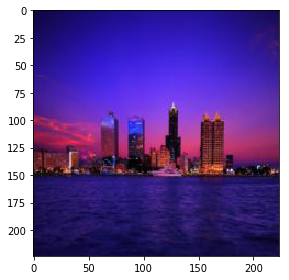

第二相似的圖片為：
NO： 660
台北101
相似度： 0.994069907684794
介紹： 台北101購物中心為地上5樓，地下1樓的購物空間，23000坪，是臺灣首座國際頂級購物中心。擁有許多精品旗艦店，如BALLY、LV、Prada、Gucci、Cartier、DIOR及FENDI等，消費者可以享受到最多樣的選擇，與全球流行零時差，輕鬆擁有愉悅的購物時刻。 臺北101購物中心有歐式、日式、泰式、中式等各國風味美食餐廳，如代官山居食屋、晶湯匙泰式料理、隨意鳥地方、九如浙江美食、川滇食尚等，美食街擁有上千個座位，非常舒適的用餐環境。4樓都會廣場擁有完美的空間設計規劃，佔地500餘坪，挑高40米。採光自然，與四周的露天座椅融合為一體，散發著明亮開闊的現代氛圍。與世貿中心和ATT 4 FUN購物中心有空橋連接，近君悅飯店，交通十分方便。


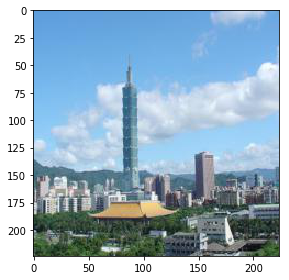

第三相似的圖片為：
NO： 650
南港山系-象山親山步道
相似度： 0.993615976313104
介紹： 象山因外形似象頭而得名，位於臺北盆地東南方的信義區，與虎山地質相同主要由砂岩組成，因造山作用步道中可見黃褐色陡峭的岩壁與巨石，加上自然環境生物、鳥類種類繁多，使得整座山如同一座天然生態樂園般，成為民眾接近淺山、享受戶外綠林悠閒時光的好去處。步道沿線設有解說牌引導民眾參訪，區內各種稜線、岩壁、山坡等不同環境，孕育出多種蕨類植物處處可見，其中又以金狗毛蕨與筆筒樹古老蕨類族群最大，數量居臺北市之冠。在過去醫學普遍不發達的年代，金狗毛是民間常用來止血的最佳良藥，而筆筒樹群林則是臺北市最珍貴的的生態特色。登頂象山眺望，臺北盆地的地景幾乎一覽無遺，其尾稜延伸嵌入信義區中強公園，成為當地居民晨昏散步的最佳去處，也是近山民眾假日休閒、舒緩身心的綠色地帶。六巨石象山上巨石林立的奇特景象，又稱老萊峽。從這裡攀上巨石可以一覽繁華的信義商圈，是一處熱門的拍照景點，清晨上山可以欣賞臺北101大樓在晨曦中初醒的景象，黃昏更可欣賞信義區都會華廈，夕陽餘暉西下、華燈初上的夜晚景象，十分亮麗耀眼。逸賢亭（象山頂）位於逸賢亭象山頂、六角亭旁步道盡頭的平台，視野展望極佳，可以欣賞象山的全貌，尤其是象頭與象鼻頗具傳神。鼻樑處即為永春高中，長長的象鼻子則是稜線深入松山路與松德院區之間的平台。一線天象山親山步道近松德院區方向有處名為一線天駐腳點，因兩壁山脊線十分接近，巨崖岩壁突出遮天，山友自步道仰頭望天，只見崖壁縫隙間的天空又窄又細，因而稱為一線天。登高遠眺　繁華台北盡收眼底四獸山是距離台北市松山、信義區最近的山頭。象山位在四獸山步道系統中最高點，由於前方無屏障，登高遠望視野遼闊，不僅信義商圈一覽無遺－101金融大樓、世貿中心、華納威秀、新光三越等醒目建築歷歷可數，台北盆地風光也盡收眼底。自然生態精采可期巨石公園象山範圍不大，賞景點卻不少。其中盤踞山頭的「六巨石」是象山的地標景觀，巨石林立、景觀奇特，遊象山不攀上巨石瞧瞧，可就對不起自己了。在頂上觀景滋味不同，迎風四望無際，想拍101，來這裡準沒錯！至於鳥瞰台北盆地的最佳位置，自然是位於稜線上、視野開闊的「超然亭」；有此「超然」名號，便是因為由此觀景居象山眾涼亭之冠。站立於超然亭的平台上，近可見山下的信義計畫區，放遠望去則是圓山、北投焚化爐、觀音山

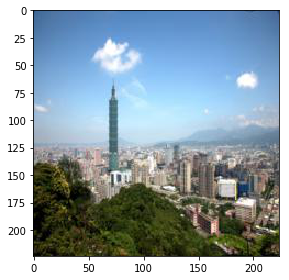

第四相似的圖片為：
NO： 877
射日塔
相似度： 0.9816216489771432
介紹： 全台獨一無二的景觀，連夸父都追不上的射日塔！【射日塔】為最具代表性的嘉義市新地標，在嘉義公園內，民眾只要仰頭看，便能看見一朵巨型豔紫荊花，與藍天相輝映，豔紫荊花為嘉義市巿花，就這樣的透過射日塔照射開來，充分顯示嘉義市花之美！在這座以嘉義市市花為斜頂的圓型建築，原所在地是舊忠烈祠原址，高度 62 公尺的射日塔，爬到第十，十一最高樓層處，可360度眺望諸羅全景，山城美色盡收眼底。入口處有象徵台灣守護神的雲豹銅雕一對，塔的底層是【忠烈祠】，烈士牌位以白色大理石雕成，供民眾參拜。二樓以上為射日塔，為了改變民眾對舊有忠烈祠的刻板印象，這棟建築不論內外都有極大的突破，注入更多人文藝術氣息。．外部造型說明外部造型靈感取自於阿里山神木，其褐色鋁條之紋理似神木之外皮，至中間留有高 40 公尺的【一線天】，有如劈開之神木，頂層規劃為咖啡廳及眺望塔，民眾可邊品嚐精緻美食，邊細數桃城之美。．內部造型說明內部設有取


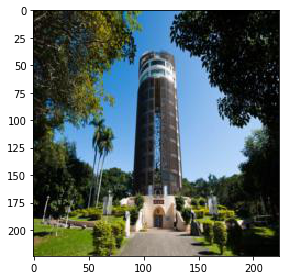

第五相似的圖片為：
NO： 587
旗津風車公園
相似度： 0.9616743901315941
介紹： 旗津風車公園它銜接旗津漁港的觀光步道，扮演過港隧道進入旗津門面的第一個海岸印象景點，旗津擁有豐沛的風力資源，七座造型獨特的三葉式風車面對遼闊的海面不停轉動，園區內有觀海看台及表演廣場，造型獨特又可愛的海洋生物拼貼創作，既生動又有趣，堪稱旗津最療癒的景點。若騎單車到此，約為旗津地區的中段處，剛好可稍作休息。從風車下方就能看到海面上襲來一波波巨浪，打在岸邊激起滔天浪花，十分壯觀。


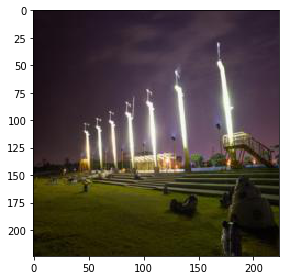

In [27]:
#尋找最相似的圖片
maxIndex = 0#放最大值的索引(0到894)
maxValue = -2.0#放最大值的值

for i in range(895):
    if similarity2[i][0]>maxValue:
        maxValue = similarity2[i][0]
        maxIndex = int(similarity2[i][1])

similarity2[maxIndex][0] = -3.0#相似度歸-3.0

print('最相似的圖片為：')
print('NO：', maxIndex+1)
print(placesNameTW[maxIndex])
print('相似度：', maxValue)
print('介紹：', placesIntroductionTW[maxIndex])

#顯示最相似的圖片
name2 = str(int(maxIndex +1))
while(len(name2)<8):
    name2 = "0" + name2
predictImg2 = io.imread('/Users/cloud/Desktop/open_data_image_resized/'+name2 +'.jpg')
# 顯示點陣圖
p3 = io.imshow(predictImg2)
plt.show(p3)


#尋找第二相似的圖片
maxIndex = 0#放最大值的索引(0到894)
maxValue = -2.0#放最大值的值
#maxNumber = 0#放最大值的編號

for i in range(895):
    if similarity2[i][0]>maxValue:
        maxValue = similarity2[i][0]
        maxIndex = int(similarity2[i][1])

similarity2[maxIndex][0] = -3.0#相似度歸-3.0

print('第二相似的圖片為：')
print('NO：', maxIndex+1)
print(placesNameTW[maxIndex])
print('相似度：', maxValue)
print('介紹：', placesIntroductionTW[maxIndex])

#顯示第二相似的圖片
name2 = str(int(maxIndex +1))
while(len(name2)<8):
    name2 = "0" + name2
predictImg2 = io.imread('/Users/cloud/Desktop/open_data_image_resized/'+name2 +'.jpg')
# 顯示點陣圖
p3 = io.imshow(predictImg2)
plt.show(p3)

#尋找第三相似的圖片
maxIndex = 0#放最大值的索引(0到894)
maxValue = -2.0#放最大值的值
maxNumber = 0#放最大值的編號

for i in range(895):
    if similarity2[i][0]>maxValue:
        maxValue = similarity2[i][0]
        maxIndex = int(similarity2[i][1])

similarity2[maxIndex][0] = -3.0#相似度歸-3.0

print('第三相似的圖片為：')
print('NO：', maxIndex+1)
print(placesNameTW[maxIndex])
print('相似度：', maxValue)
print('介紹：', placesIntroductionTW[maxIndex])

#顯示第三相似的圖片
name2 = str(int(maxIndex +1))
while(len(name2)<8):
    name2 = "0" + name2
predictImg2 = io.imread('/Users/cloud/Desktop/open_data_image_resized/'+name2 +'.jpg')
# 顯示點陣圖
p3 = io.imshow(predictImg2)
plt.show(p3)

#尋找第四相似的圖片
maxIndex = 0#放最大值的索引(0到894)
maxValue = -2.0#放最大值的值
maxNumber = 0#放最大值的編號

for i in range(895):
    if similarity2[i][0]>maxValue:
        maxValue = similarity2[i][0]
        maxIndex = int(similarity2[i][1])

similarity2[maxIndex][0] = -3.0#相似度歸-3.0

print('第四相似的圖片為：')
print('NO：', maxIndex+1)
print(placesNameTW[maxIndex])
print('相似度：', maxValue)
print('介紹：', placesIntroductionTW[maxIndex])

#顯示第四相似的圖片
name2 = str(int(maxIndex +1))
while(len(name2)<8):
    name2 = "0" + name2
predictImg2 = io.imread('/Users/cloud/Desktop/open_data_image_resized/'+name2 +'.jpg')
# 顯示點陣圖
p3 = io.imshow(predictImg2)
plt.show(p3)

#尋找第五相似的圖片
maxIndex = 0#放最大值的索引(0到894)
maxValue = -2.0#放最大值的值
maxNumber = 0#放最大值的編號

for i in range(895):
    if similarity2[i][0]>maxValue:
        maxValue = similarity2[i][0]
        maxIndex = int(similarity2[i][1])

similarity2[maxIndex][0] = -3.0#相似度歸-3.0

print('第五相似的圖片為：')
print('NO：', maxIndex+1)
print(placesNameTW[maxIndex])
print('相似度：', maxValue)
print('介紹：', placesIntroductionTW[maxIndex])

#顯示第五相似的圖片
name2 = str(int(maxIndex +1))
while(len(name2)<8):
    name2 = "0" + name2
predictImg2 = io.imread('/Users/cloud/Desktop/open_data_image_resized/'+name2 +'.jpg')
# 顯示點陣圖
p3 = io.imshow(predictImg2)
plt.show(p3)